In [3]:
from datetime import datetime, timedelta
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #For solving import pandas_datareader issue
import numpy as np
import datetime
import csv
import requests
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data, wb
import nsepy


In [4]:
#pip install nsepy

In [5]:
start = datetime.datetime(2020,3,20)
end = datetime.datetime(2020,4,20)

In [6]:
sbin = nsepy.get_history(symbol='SBIN',
                    start=datetime.datetime(2000,4,1), 
                    end=datetime.datetime(2020,7,12))

In [7]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13,NaN,NaN,NaN
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13,NaN,NaN,NaN
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13,NaN,NaN,NaN
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13,NaN,NaN,NaN
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14,215925.0,9492655.0,0.2168
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15,245296.0,7395581.0,0.1342
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15,620914.0,33127615.0,0.2315


In [8]:
print("checking if any null values are present\n", sbin.isna().sum())

checking if any null values are present
 Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2789
Deliverable Volume     452
%Deliverble            452
dtype: int64


In [9]:
sbin.drop(['Trades', 'Deliverable Volume','%Deliverble'], axis = 1,inplace=True) 

In [10]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15


In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})


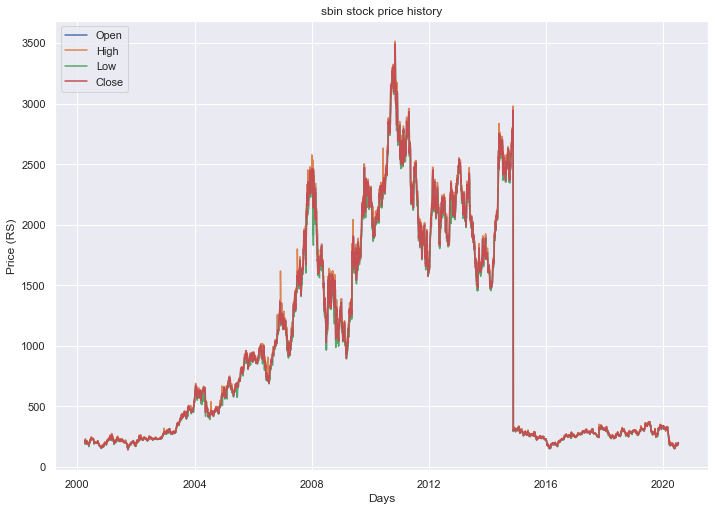

In [12]:

plt.figure()
plt.plot(sbin["Open"])
plt.plot(sbin["High"])
plt.plot(sbin["Low"])
plt.plot(sbin["Close"])
plt.title('sbin stock price history')
plt.ylabel('Price (RS)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

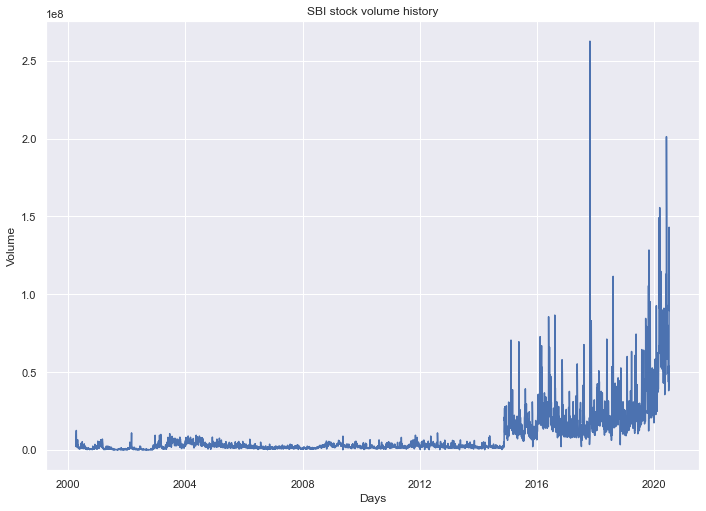

In [13]:
plt.figure()
plt.plot(sbin["Volume"])
plt.title('SBI stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [14]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15


In [15]:

X_train = X[:4000]
X_test = X[4000:]
y_train = y[:4000]
y_test=y[4000:]

NameError: name 'X' is not defined

In [21]:
training_set = sbin.iloc[:4000, 2:3].values
test_set=sbin.iloc[4000:, 2:3].values

In [22]:
training_set.shape

(4000, 1)

In [23]:
test_set

array([[186.75],
       [187.3 ],
       [194.35],
       ...,
       [188.6 ],
       [191.9 ],
       [199.1 ]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
training_set_scaled

array([[0.01890399],
       [0.02145737],
       [0.0163954 ],
       ...,
       [0.01397641],
       [0.01384202],
       [0.01506645]])

In [26]:
X_train = []
y_train = []
for i in range(60, 4000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [27]:
(X_train).shape

(3940, 60, 1)

In [28]:
X_train

array([[[0.01890399],
        [0.02145737],
        [0.0163954 ],
        ...,
        [0.02841571],
        [0.02578767],
        [0.02556369]],

       [[0.02145737],
        [0.0163954 ],
        [0.0163506 ],
        ...,
        [0.02578767],
        [0.02556369],
        [0.02599671]],

       [[0.0163954 ],
        [0.0163506 ],
        [0.01865014],
        ...,
        [0.02556369],
        [0.02599671],
        [0.02645961]],

       ...,

       [[0.01730626],
        [0.01775422],
        [0.01630581],
        ...,
        [0.01266239],
        [0.01209497],
        [0.01243841]],

       [[0.01775422],
        [0.01630581],
        [0.01279677],
        ...,
        [0.01209497],
        [0.01243841],
        [0.01397641]],

       [[0.01630581],
        [0.01279677],
        [0.01181126],
        ...,
        [0.01243841],
        [0.01397641],
        [0.01384202]]])

In [34]:
pip install seq2seq-lstm

     |████████████████████████████████| 7.2 MB 11.6 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
Note: you may need to restart the kernel to use updated packages.


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
124/124 [==============================] - 7s 59ms/step - loss: 0.0102
Epoch 2/20
124/124 [==============================] - 8s 64ms/step - loss: 0.0039
Epoch 3/20
124/124 [==============================] - 7s 58ms/step - loss: 0.0035
Epoch 4/20
124/124 [==============================] - 7s 57ms/step - loss: 0.0032
Epoch 5/20
124/124 [==============================] - 7s 58ms/step - loss: 0.0032
Epoch 6/20
124/124 [==============================] - 8s 67ms/step - loss: 0.0028
Epoch 7/20
124/124 [==============================] - 8s 68ms/step - loss: 0.0026
Epoch 8/20
124/124 [==============================] - 9s 72ms/step - loss: 0.0023
Epoch 9/20
124/124 [==============================] - 8s 61ms/step - loss: 0.0023
Epoch 10/20
124/124 [==============================] - 8s 64ms/step - loss: 0.0020
Epoch 11/20
124/124 [==============================] - 7s 59ms/step - loss: 0.0020
Epoch 12/20
124/124 [==============================] - 7s 58ms/step - loss: 0.0019
Epoch 13/20
1

In [39]:
#test_set=sbin.iloc[4000:, 1:2].values
real_stock_price = sbin.iloc[4000:, 2:3].values
len(real_stock_price)

1046

In [40]:
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total = sbin['Open']
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)


In [41]:
inputs

array([[184.9 ],
       [182.15],
       [180.65],
       ...,
       [188.9 ],
       [192.8 ],
       [198.  ]])

In [42]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60,1046 ):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

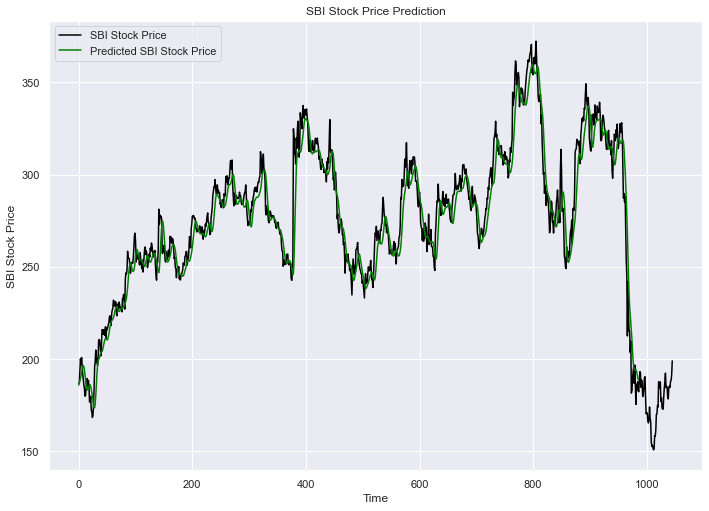

In [43]:

plt.figure()
plt.plot(real_stock_price, color = 'black', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [44]:
sbin.index[:4000]

Index([2000-04-03, 2000-04-04, 2000-04-05, 2000-04-06, 2000-04-07, 2000-04-10,
       2000-04-11, 2000-04-12, 2000-04-13, 2000-04-17,
       ...
       2016-04-01, 2016-04-04, 2016-04-05, 2016-04-06, 2016-04-07, 2016-04-08,
       2016-04-11, 2016-04-12, 2016-04-13, 2016-04-18],
      dtype='object', name='Date', length=4000)

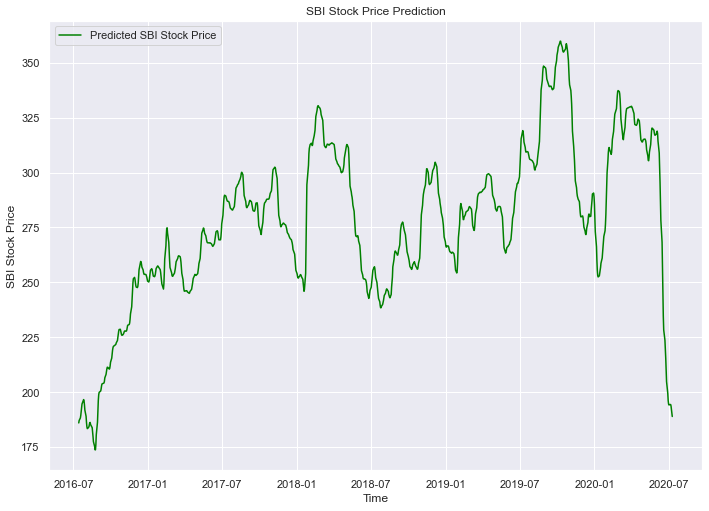

In [45]:
#plt.plot(real_stock_price, color = 'black', label = 'SBI Stock Price')
plt.plot(sbin.index[4060:],predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

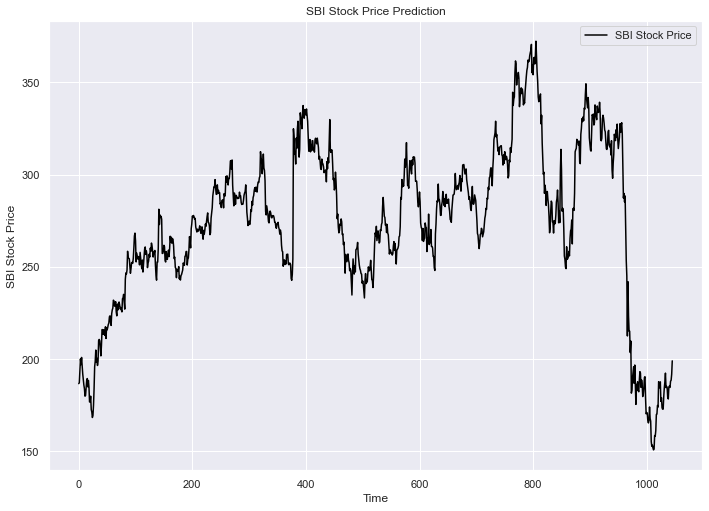

In [46]:
plt.plot(real_stock_price, color = 'black', label = 'SBI Stock Price')
#plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [47]:
len(real_stock_price)

1046

In [48]:
len(predicted_stock_price)

986

In [49]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15
